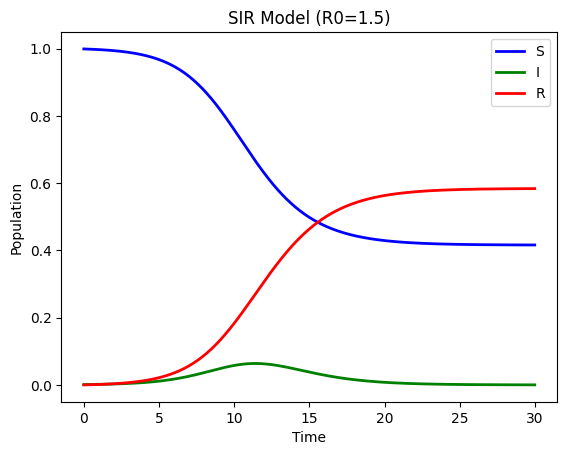

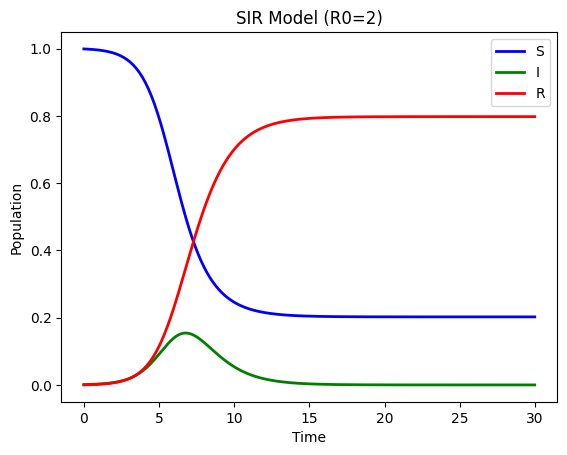

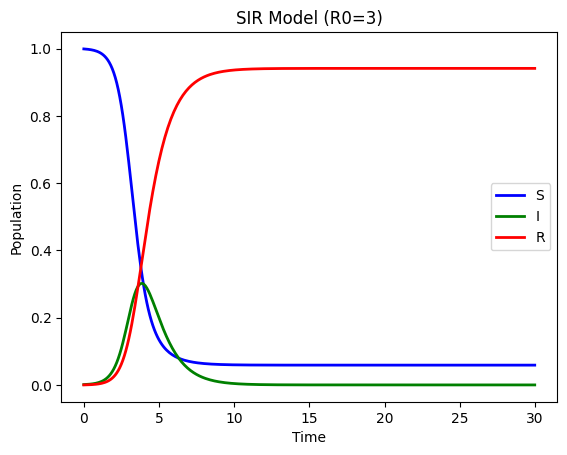

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def dfdt(f, par):
    beta = par[0]
    gamma = par[1]
    N = par[2]
    S, I, R = f
    lambd = beta * (I / N)
    df1 = -lambd * S
    df2 = lambd * S - gamma * I
    df3 = -df1 - df2
    return np.array([df1, df2, df3])

arch = ["R0=1.5.txt", "R0=2.txt", "R0=3.txt"]
case = 0
for R0 in [1.5, 2, 3]:
    case += 1
    N = 1
    gamma = 1
    beta = R0 * gamma
    I = 0.001
    S = N - I
    R = N - S - I
    f = np.array([S, I, R])
    dt = 0.01
    nt = 3000
    npr = 10
    out = np.zeros((nt // npr + 1, 4))
    out[0] = np.array([0, S, I, R])

    for it in range(1, nt + 1):
        time = (it - 1) * dt
        der = dfdt(f, [beta, gamma, N])
        f = f + der * dt
        if it % npr == 0:
            out[it // npr] = np.array([time] + list(f))

    np.savetxt(arch[case - 1], out, delimiter="\t", fmt="%1.6f", header="Time\tS\tI\tR", comments='')
    
    plt.figure()
    plt.plot(out[:, 0], out[:, 1], color='blue', linewidth=2, label='S')
    plt.plot(out[:, 0], out[:, 2], color='green', linewidth=2, label='I')
    plt.plot(out[:, 0], out[:, 3], color='red', linewidth=2, label='R')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.title(f'SIR Model (R0={R0})')
    plt.legend()
    plt.savefig(f'sir_R0_{R0}.png')
    plt.show()
    plt.close()
